In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

df = pd.read_csv("height-weight.csv")

In [44]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [45]:
df.duplicated().sum()

1

In [46]:
df.drop_duplicates()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [47]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

<Axes: xlabel='Weight', ylabel='Count'>

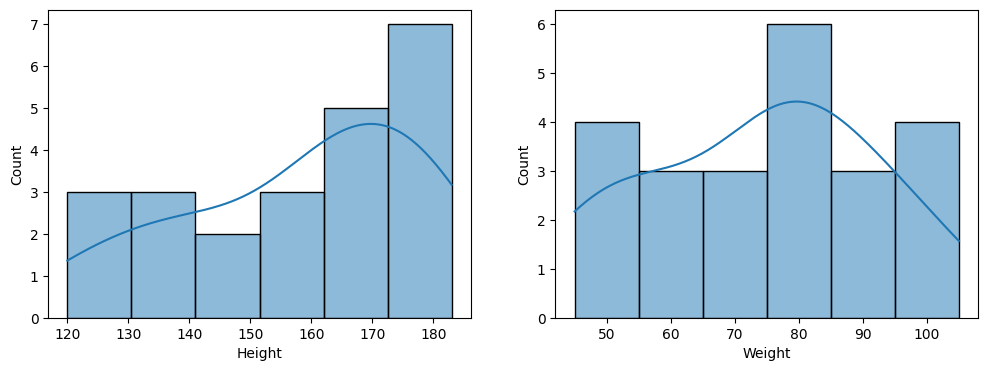

In [48]:
fig, axes = plt.subplots(1,2,figsize = (12,4))
sbn.histplot(df['Height'],kde = True,ax=axes[0])
sbn.histplot(df['Weight'],kde = True,ax=axes[1])

<Axes: xlabel='Height', ylabel='Weight'>

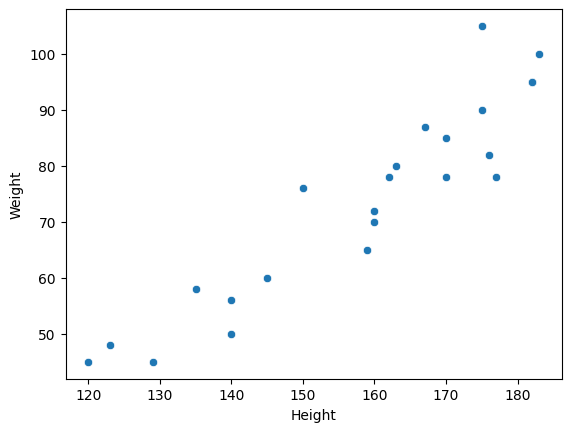

In [49]:
sbn.scatterplot(x = df['Height'],y = df['Weight'],data= df)

In [50]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


<Axes: >

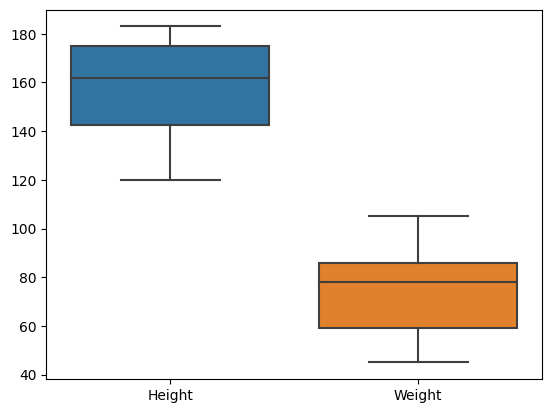

In [51]:
sbn.boxplot(data = df[['Height','Weight']])

<Axes: >

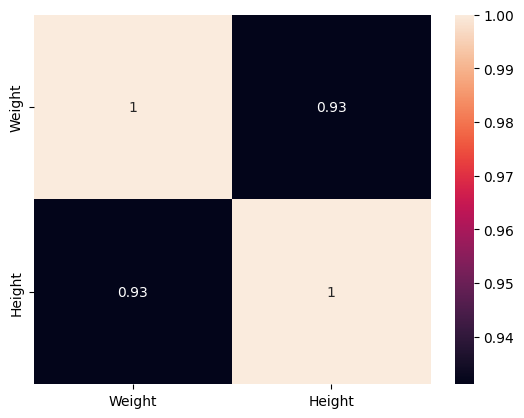

In [52]:
sbn.heatmap(data = df.corr(),annot=True)

In [53]:
# divide the dataset into independent and dependent features
X = df[['Weight']] #independent feauture
y = df[['Height']]  #dependent feature

In [54]:
X.shape

(23, 1)

In [55]:
X


,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [56]:
# Divide dataset into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [57]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [58]:
y_train.shape,y_test.shape 

((18, 1), (5, 1))

In [59]:
# Do standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

In [61]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [62]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

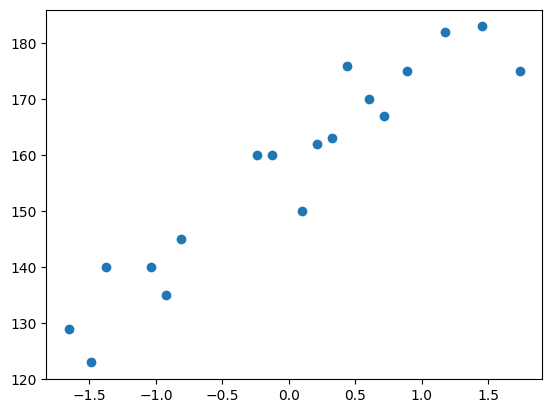

In [63]:
plt.scatter(X_train,y_train)

In [64]:
# train the model
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression()

In [65]:
regressor.fit(X_train,y_train)

LinearRegression()

In [66]:
# theta0
regressor.intercept_

array([157.5])

In [67]:
#theta1
regressor.coef_

array([[17.03440872]])

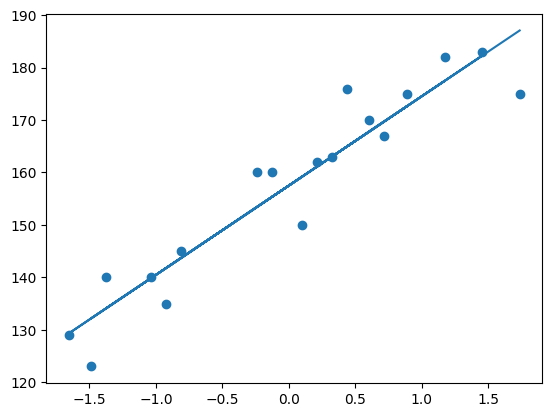

In [68]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

In [69]:
# prediction for test data

y_pred_test = regressor.predict(X_test)

In [70]:
y_pred_test

array([[161.08467086],
       [161.08467086],
       [129.3041561 ],
       [177.45645118],
       [148.56507414]])

In [71]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


In [72]:
# lets look at performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

In [73]:
mse,mae,rmse

(109.77592599051664, 9.822657814519232, 10.477400726827081)

In [74]:
# calculate r square
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

In [75]:
score

0.776986986042344

In [76]:
# Adjusted R Square

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [77]:
# 70% accuracy